In [1]:
import torchvision
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
vit_l_16_weights = torchvision.models.ViT_L_16_Weights.IMAGENET1K_V1
vit_l_16_model = torchvision.models.vit_l_16(vit_l_16_weights).to(device)

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [4]:
from train_model import print_summary
print_summary(input_size=(32, 3, 224, 224), model=vit_l_16_model)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 1000]           1,024                True
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 1024, 14, 14]   787,456              True
├─Encoder (encoder)                                          [32, 197, 1024]      [32, 197, 1024]      201,728              True
│    └─Dropout (dropout)                                     [32, 197, 1024]      [32, 197, 1024]      --                   --
│    └─Sequential (layers)                                   [32, 197, 1024]      [32, 197, 1024]      --                   True
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 1024]      [32, 197, 1024]      12,596,224           True
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 1024]      [32, 197, 10

In [5]:
vit_transforms = vit_l_16_weights.transforms()
vit_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[242]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [24]:
dataset_dir = "../datasets/"

train_data = torchvision.datasets.Flowers102(root=dataset_dir, split='train', download=False, transform=vit_transforms)
test_data = torchvision.datasets.Flowers102(root=dataset_dir, split='val', download=False, transform=vit_transforms)


In [6]:
len(train_data), len(test_data)

(1020, 1020)

In [8]:
for parameter in vit_l_16_model.parameters():
    parameter.requires_grad = False

In [7]:
class_names = {"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid", "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia", "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura", "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium", "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily", "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william", "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon", "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula", "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower", "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple", "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus", "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily", "46": "wallflower", "77": "passion flower", "51": "petunia"}

In [25]:
from prepare_data import create_dataloaders
train_dataloader, test_dataloader, _= create_dataloaders(train_data=train_data, test_data=test_data, data_folder_imported=True, transform=vit_transforms, batch_size=32)
len(train_dataloader), len(test_dataloader)

(32, 32)

In [16]:
vit_l_16_model.heads = nn.Sequential(nn.Linear(in_features=1024, out_features=102))

In [17]:
print_summary(model=vit_l_16_model, input_size=(32, 3, 224, 224))

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 102]            1,024                Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 1024, 14, 14]   (787,456)            False
├─Encoder (encoder)                                          [32, 197, 1024]      [32, 197, 1024]      201,728              False
│    └─Dropout (dropout)                                     [32, 197, 1024]      [32, 197, 1024]      --                   --
│    └─Sequential (layers)                                   [32, 197, 1024]      [32, 197, 1024]      --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 1024]      [32, 197, 1024]      (12,596,224)         False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 1024]      [32, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'oxeye daisy')

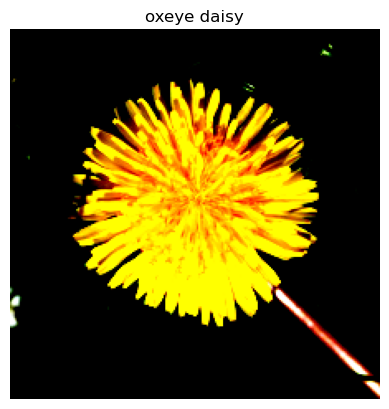

In [25]:
image_batch, label_batch = next(iter(train_dataloader))
test_data.__class__
plt.imshow(image_batch[0].permute(1,2,0))
plt.axis(False)
plt.title(class_names[str(int(label_batch[0].numpy()))])

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(momentum=0.9, lr=0.001, params=vit_l_16_model.parameters())
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(T_max=500, verbose=False, optimizer=optimizer)
torch.cuda.manual_seed(1)
np.random.seed(1)
from train_model import train
vit_l_16_flowers_results = train(model=vit_l_16_model,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                lr_scheduler=lr_scheduler,
                                epochs=14,
                                train_dataloader=train_dataloader,
                                test_dataloader=test_dataloader,
                                device=device)

  7%|▋         | 1/14 [00:24<05:18, 24.49s/it]

Learning Rate: 0.0009899275261921233
Epoch: 1 | train_loss: 4.6230 | train_acc: 0.0098 | test_loss: 4.4728 | test_acc: 0.0522


 14%|█▍        | 2/14 [00:48<04:53, 24.48s/it]

Learning Rate: 0.0009601159236829344
Epoch: 2 | train_loss: 4.3129 | train_acc: 0.1190 | test_loss: 4.2133 | test_acc: 0.1702


 21%|██▏       | 3/14 [01:13<04:29, 24.51s/it]

Learning Rate: 0.0009117662988142127
Epoch: 3 | train_loss: 4.0087 | train_acc: 0.2842 | test_loss: 3.9781 | test_acc: 0.2783


 29%|██▊       | 4/14 [01:37<04:04, 24.49s/it]

Learning Rate: 0.0008468266529064013
Epoch: 4 | train_loss: 3.7362 | train_acc: 0.4548 | test_loss: 3.7702 | test_acc: 0.3890


 36%|███▌      | 5/14 [02:02<03:40, 24.51s/it]

Learning Rate: 0.000767913397489497
Epoch: 5 | train_loss: 3.4937 | train_acc: 0.5935 | test_loss: 3.5902 | test_acc: 0.4838


 43%|████▎     | 6/14 [02:27<03:16, 24.53s/it]

Learning Rate: 0.0006782059393566241
Epoch: 6 | train_loss: 3.2870 | train_acc: 0.6756 | test_loss: 3.4382 | test_acc: 0.5506


 50%|█████     | 7/14 [02:51<02:51, 24.55s/it]

Learning Rate: 0.000581318582597441
Epoch: 7 | train_loss: 3.1118 | train_acc: 0.7441 | test_loss: 3.3126 | test_acc: 0.6034


 57%|█████▋    | 8/14 [03:16<02:27, 24.52s/it]

Learning Rate: 0.00048115490866503186
Epoch: 8 | train_loss: 2.9684 | train_acc: 0.7893 | test_loss: 3.2123 | test_acc: 0.6336


 64%|██████▍   | 9/14 [03:40<02:02, 24.52s/it]

Learning Rate: 0.0003817505014881369
Epoch: 9 | train_loss: 2.8564 | train_acc: 0.8093 | test_loss: 3.1335 | test_acc: 0.6514


 71%|███████▏  | 10/14 [04:05<01:38, 24.53s/it]

Learning Rate: 0.0002871103542174631
Epoch: 10 | train_loss: 2.7697 | train_acc: 0.8234 | test_loss: 3.0750 | test_acc: 0.6650


 79%|███████▊  | 11/14 [04:29<01:13, 24.56s/it]

Learning Rate: 0.00020104750847124041
Epoch: 11 | train_loss: 2.7052 | train_acc: 0.8386 | test_loss: 3.0332 | test_acc: 0.6758


 86%|████████▌ | 12/14 [04:54<00:49, 24.56s/it]

Learning Rate: 0.0001270294272879088
Epoch: 12 | train_loss: 2.6611 | train_acc: 0.8479 | test_loss: 3.0058 | test_acc: 0.6807


 93%|█████████▎| 13/14 [05:19<00:24, 24.60s/it]

Learning Rate: 6.803829140358213e-05
Epoch: 13 | train_loss: 2.6327 | train_acc: 0.8513 | test_loss: 2.9898 | test_acc: 0.6846


100%|██████████| 14/14 [05:43<00:00, 24.54s/it]

Learning Rate: 2.645084750262784e-05
Epoch: 14 | train_loss: 2.6162 | train_acc: 0.8546 | test_loss: 2.9822 | test_acc: 0.6865


lets fine tune with b-16

In [29]:
vit_b_16_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
vit_b_16_model = torchvision.models.vit_b_16(vit_b_16_weights).to(device=device)

/home/emir/miniconda3/envs/mlptorch/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [30]:
vit_transforms = vit_b_16_weights.transforms()

In [31]:
from prepare_data import create_dataloaders
train_dataloader, test_dataloader, _= create_dataloaders(train_data=train_data, test_data=test_data, data_folder_imported=True, transform=vit_transforms, batch_size=32)

In [32]:
len(train_dataloader)

32

In [33]:
for parameter in vit_b_16_model.parameters():
    parameter.requires_grad = False

In [34]:
from train_model import print_summary
print_summary(input_size=(32, 3, 224, 224), model=vit_b_16_model)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 1000]           768                  False
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 19

In [35]:
vit_b_16_model.heads = nn.Sequential(nn.Linear(in_features=768, out_features=768),
                                    nn.Linear(in_features=768, out_features=102))

In [36]:
from train_model import print_summary

print_summary(input_size=(32, 3, 224, 224), model=vit_b_16_model)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 102]            768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [37]:
np.random.seed(1)
torch.cuda.manual_seed(1)
optimizer = torch.optim.SGD(momentum=0.9, weight_decay=0.1, params=vit_b_16_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
from train_model import train
vit_b_16_flowers_results = train(model=vit_b_16_model,
                                train_dataloader=train_dataloader,
                                test_dataloader=test_dataloader,
                                epochs=14,
                                device=device,
                                optimizer=optimizer,
                                loss_fn=loss_fn)

  7%|▋         | 1/14 [00:08<01:50,  8.51s/it]

Learning Rate: 0.001
Epoch: 1 | train_loss: 4.6202 | train_acc: 0.0266 | test_loss: 4.5339 | test_acc: 0.0420


 14%|█▍        | 2/14 [00:17<01:42,  8.51s/it]

Learning Rate: 0.001
Epoch: 2 | train_loss: 4.4537 | train_acc: 0.0802 | test_loss: 4.3936 | test_acc: 0.1378


 21%|██▏       | 3/14 [00:25<01:34,  8.56s/it]

Learning Rate: 0.001
Epoch: 3 | train_loss: 4.3016 | train_acc: 0.2172 | test_loss: 4.2747 | test_acc: 0.2681


 29%|██▊       | 4/14 [00:34<01:25,  8.59s/it]

Learning Rate: 0.001
Epoch: 4 | train_loss: 4.1694 | train_acc: 0.3986 | test_loss: 4.1710 | test_acc: 0.3761


 36%|███▌      | 5/14 [00:42<01:17,  8.59s/it]

Learning Rate: 0.001
Epoch: 5 | train_loss: 4.0534 | train_acc: 0.5098 | test_loss: 4.0762 | test_acc: 0.4263


 43%|████▎     | 6/14 [00:51<01:09,  8.63s/it]

Learning Rate: 0.001
Epoch: 6 | train_loss: 3.9486 | train_acc: 0.5988 | test_loss: 3.9919 | test_acc: 0.4881


 50%|█████     | 7/14 [01:00<01:00,  8.61s/it]

Learning Rate: 0.001
Epoch: 7 | train_loss: 3.8527 | train_acc: 0.6659 | test_loss: 3.9123 | test_acc: 0.5254


 57%|█████▋    | 8/14 [01:08<00:51,  8.59s/it]

Learning Rate: 0.001
Epoch: 8 | train_loss: 3.7643 | train_acc: 0.7185 | test_loss: 3.8392 | test_acc: 0.5557


 64%|██████▍   | 9/14 [01:17<00:43,  8.60s/it]

Learning Rate: 0.001
Epoch: 9 | train_loss: 3.6840 | train_acc: 0.7292 | test_loss: 3.7720 | test_acc: 0.5664


 71%|███████▏  | 10/14 [01:25<00:34,  8.59s/it]

Learning Rate: 0.001
Epoch: 10 | train_loss: 3.6077 | train_acc: 0.7570 | test_loss: 3.7070 | test_acc: 0.5771


 79%|███████▊  | 11/14 [01:34<00:25,  8.60s/it]

Learning Rate: 0.001
Epoch: 11 | train_loss: 3.5376 | train_acc: 0.7764 | test_loss: 3.6462 | test_acc: 0.5947


 86%|████████▌ | 12/14 [01:43<00:17,  8.61s/it]

Learning Rate: 0.001
Epoch: 12 | train_loss: 3.4719 | train_acc: 0.7832 | test_loss: 3.5905 | test_acc: 0.6145


 93%|█████████▎| 13/14 [01:51<00:08,  8.63s/it]

Learning Rate: 0.001
Epoch: 13 | train_loss: 3.4102 | train_acc: 0.7949 | test_loss: 3.5363 | test_acc: 0.6126


100%|██████████| 14/14 [02:00<00:00,  8.60s/it]

Learning Rate: 0.001
Epoch: 14 | train_loss: 3.3517 | train_acc: 0.7987 | test_loss: 3.4876 | test_acc: 0.6024


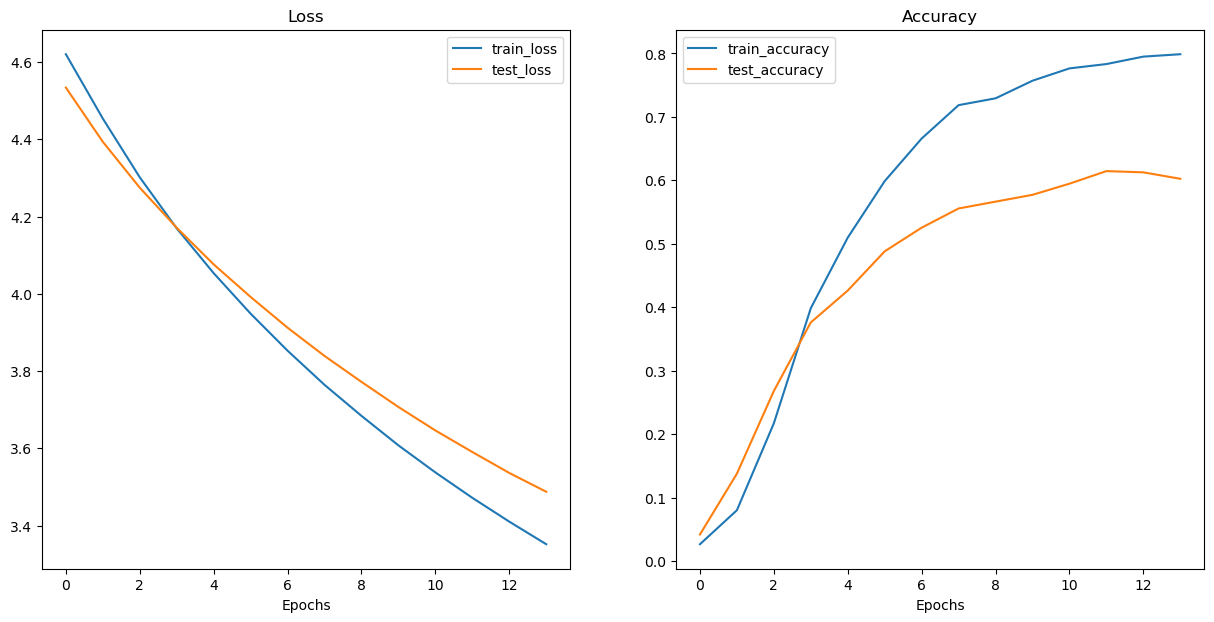

In [38]:
from plot_loss_function import plot_loss_function
plot_loss_function(vit_b_16_flowers_results)